# About Dataset

Context

To better follow the energy consumption, the government wants energy suppliers to install smart meters in every home in England, Wales and Scotland. There are more than 26 million homes for the energy suppliers to get to, with the goal of every home having a smart meter by 2020.

This roll out of meter is lead by the European Union who asked all member governments to look at smart meters **as part of measures to upgrade our energy supply and tackle climate change.** After an initial study, the British government decided to adopt smart meters as part of their plan to update our ageing energy system.

In this dataset, you will find a [refactorised version of the data][1] from the London data store, that contains the energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014. The data from **the smart meters seems associated only to the electrical consumption.**

There is infomations on the ACORN classification details that you can find in this report or the website of CACI.

I added weather data for London area, I used the darksky api to collect this data.

# Content

There is 19 files in this dataset :

1. informations_households.csv : this file that contains all the information on the households in the panel (their acorn group, their tariff) and in which block.csv.gz file their data are stored

2. halfhourly_dataset.zip: Zip file that contains the block files with the half-hourly smart meter measurement

3. daily_dataset.zip: Zip file that contains the block files with the daily information like the number of measures, minimum, maximum, mean, median, sum and std.

4. acorn_details.csv : Details on the acorn groups and their profile of the people in the group, it's come from this xlsx spreadsheet.The first three columns are the attributes studied, the ACORN-X is the index of the attribute. At a national scale, the index is 100 if for one column the value is 150 it means that there are 1.5 times more people with this attribute in the ACORN group than at the national scale. You can find an explanation on the CACI website

5. weatherdailydarksky.csv : that contains the daily data from darksky api. You can find more details about the parameters in the documentation of the api

6. weatherhourlydarksky.csv : that contains the hourly data from darksky api. You can find more details about the parameters in the documentation of the api

# Acknowledgements

All the big work of data collection has been done by the UK power networks for the smart meter data.

The details related at the acorn group are provided by the CACI.

The weather data are from darksky.

# Inspiration

For me some ideas to analyze the data:

Segmentation of the consumption daily pattern
Disaggregation of the electricity load curve
Cross the consumption result and the acorn information
Forecast the electricity consumption of a household, I wrote an article on this subject
What if I add electrical heating system ? an EV battery system ?
Forecast at a global scale (London consumption)

[1]: (this link seems dead and no substitute) https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

# Check the Dataset

## Household Informations

In [3]:
pwd = "/kaggle/input/smart-meters-in-london/"
pwd

'/kaggle/input/smart-meters-in-london/'

In [4]:
pd.read_csv(pwd + "informations_households.csv")
# What is stdorToU? Any effect on energy?

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


## Daily Datesets

In [5]:
pd.read_csv(pwd+"/daily_dataset/daily_dataset/block_0.csv")

# Observation:
## Total 112 nos.of block bewteen November 2011 and February 2014
## Each block starting date is different but with the same end date
## What unit is the energy using?
## What is energy_count mean?
## energy_sum seems most useful
## How much it cost for each energy consumed?
## What energy_mean represents? each day?? 

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...
25569,MAC005492,2014-02-24,0.1690,0.175042,0.378,48,0.073174,8.402,0.079
25570,MAC005492,2014-02-25,0.1550,0.160792,0.545,48,0.082118,7.718,0.079
25571,MAC005492,2014-02-26,0.1490,0.178542,0.687,48,0.120820,8.570,0.079
25572,MAC005492,2014-02-27,0.1140,0.146167,0.478,48,0.082616,7.016,0.079


In [6]:
# Any missing value
df = pd.read_csv(pwd+"/daily_dataset/daily_dataset/block_109.csv")
df.isnull().sum()

# Some values is missing, will deal with it afterwards.

LCLid              0
day                0
energy_median      3
energy_mean        3
energy_max         3
energy_count       0
energy_std       137
energy_sum         3
energy_min         3
dtype: int64

## Half Hourly Datasets

In [7]:
df_h = pd.read_csv(pwd+"/halfhourly_dataset/halfhourly_dataset/block_0.csv")
# so energy unit is kWh/hh.
# the mean of the daily dataset is based on the half hourly energy measurement.

## User Profiles

In [8]:
pd.read_csv(pwd + "/acorn_details.csv", encoding = 'unicode_escape')
# can be used for tableau visualization

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,LEISURE TIME,Holiday Destination/Type,Asia,171.0,137.0,94.0,220.0,196.0,69.0,122.0,95.0,72.0,97.0,124.0,73.0,57.0,49.0,96.0,113.0,63.0
822,LEISURE TIME,Holiday Destination/Type,Activity / Outdoor Sports,298.0,278.0,138.0,119.0,93.0,96.0,113.0,96.0,84.0,96.0,56.0,48.0,48.0,46.0,23.0,23.0,23.0
823,LEISURE TIME,Holiday Destination/Type,Cruise,272.0,295.0,272.0,44.0,44.0,70.0,70.0,70.0,70.0,70.0,28.0,28.0,28.0,28.0,49.0,49.0,49.0
824,LEISURE TIME,Holiday Destination/Type,Package,196.0,186.0,166.0,49.0,49.0,101.0,101.0,121.0,106.0,101.0,48.0,75.0,75.0,75.0,54.0,54.0,54.0


## Combined Daily Dataset

In [9]:
df = pd.read_csv(pwd+"daily_dataset.csv")

## Weather daily dataset from Darksky

In [10]:
df_wa =  pd.read_csv(pwd + "weather_daily_darksky.csv")
df_wa.columns

# Observation:
# unit of temperature?
# icon will be categorized
# dew point

# Useful Parameters
## cloudCover
## windSpeed
## humidity
## uvIndex
## all related to temperature

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

## Weather hourly

In [11]:
df_wh = pd.read_csv(pwd + "weather_hourly_darksky.csv")
df_wh

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


# Bank holiday

In [12]:
pd.read_csv(pwd + "uk_bank_holidays.csv")
# Home energy consumption increase as holiday? what about go out have fun?

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday
7,2012-06-04,Good Friday
8,2012-02-01,New Year?s Day (substitute day)
9,2013-12-26,Boxing Day


# Energy Data

> taking only energy sum i.e. total energy use per day for a given household.

In [13]:
# Combining all blocks
for num in range(0,112):
    df = pd.read_csv(pwd + "/daily_dataset/daily_dataset/block_"+str(num)+".csv")
    df = df[["day", "LCLid", "energy_sum"]]
    df.reset_index()
    df.to_csv("hc_"+str(num)+".csv")
    
fout = open("energy.csv","a")

# first file:
for line in open("hc_0.csv"):
    fout.write(line)

# now the rest:
for num in range(0,112):
    f = open("hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
        fout.write(line)
    f.close()
fout.close()

### Energy at Day level

In [14]:
energy = pd.read_csv("energy.csv")
# energy = pd.read_csv(pwd + "/daily_dataset.csv")
len(energy)

3536007

In [15]:
len(pd.read_csv(pwd + "/daily_dataset.csv")) # Why different?

3510433

In [16]:
energy.head()

,Unnamed: 0,day,LCLid,energy_sum
0,0,2012-10-12,MAC000002,7.098
1,1,2012-10-13,MAC000002,11.087
2,2,2012-10-14,MAC000002,13.223
3,3,2012-10-15,MAC000002,10.257
4,4,2012-10-16,MAC000002,9.769


### House Count

> Each block of daily data with different starting days, this may be due to gradually increasing adoption of smart meters in London. As result, this could lead to false interpretation that energy for a partticular day might be high when it could be that the data was only collected for more number of houses. Let's look at the house count for each day.

In [17]:
house_count = energy.groupby("day")["LCLid"].nunique() # [[]] is for df output
house_count.head(10)

day
2011-11-23     13
2011-11-24     25
2011-11-25     32
2011-11-26     41
2011-11-27     41
2011-11-28     55
2011-11-29     63
2011-11-30     76
2011-12-01     92
2011-12-02    100
Name: LCLid, dtype: int64

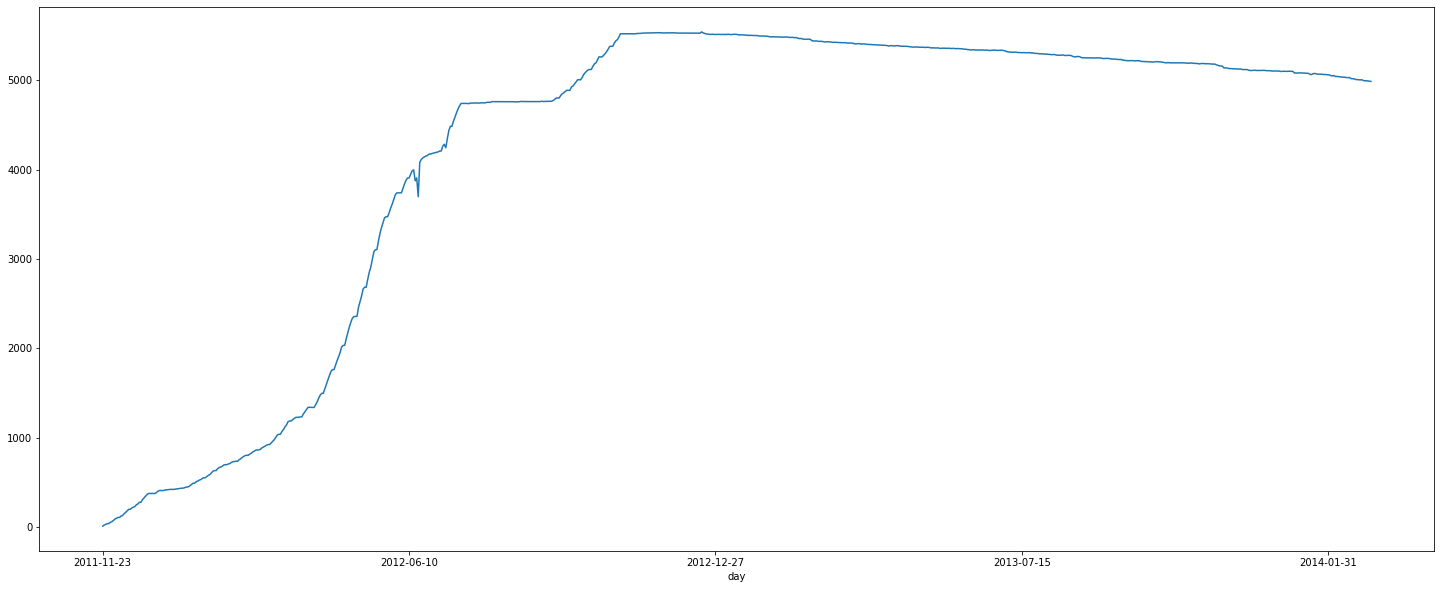

In [18]:
# Visualise the house count increase trend
house_count.plot(figsize=(25,10));

## Normalization across households

> The data collection across households are inconsistent, we will be using energy per household as the target to predict rather than energy alone. This is an optional step as we also predict for energy sum as whole for each household. 

In [19]:
energy = energy.groupby("day")[["energy_sum"]].sum()
energy = energy.merge(house_count, on = ['day'])
energy = energy.reset_index()
energy

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41
...,...,...,...
824,2014-02-24,52867.660004,4994
825,2014-02-25,52330.109999,4995
826,2014-02-26,51804.199995,4993
827,2014-02-27,52580.878999,4990


In [20]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [21]:
energy.day = pd.to_datetime(energy.day, format="%Y-%m-%d").dt.date
energy.day

0      2011-11-23
1      2011-11-24
2      2011-11-25
3      2011-11-26
4      2011-11-27
          ...    
824    2014-02-24
825    2014-02-25
826    2014-02-26
827    2014-02-27
828    2014-02-28
Name: day, Length: 829, dtype: object

In [22]:
energy["avg_energy"] = energy["energy_sum"] / energy["LCLid"]
print("Starting Point of Data at Day Level", min(energy.day))
print("Ending Point of Data at Day Level", max(energy.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [23]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436002,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


## Weather information

> Daily weather information is taken using darksky api in the dataset

In [24]:
weather = pd.read_csv(pwd + '/weather_daily_darksky.csv')
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [25]:
weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [26]:
weather["day"] = pd.to_datetime(weather["time"]) # day is given as timestamp now
weather["day"] = pd.to_datetime(weather["day"], format="%Y-%m-%d").dt.date

# selecting numeric variables (headers from weather.describe())
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [27]:
weather.head()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,day
0,11.96,123,9.40,0.79,3.88,1016.08,10.87,3.30,0.95,10.87,11.96,1.0,10.87,8.85,10.87,6.48,0.52,2011-11-11
1,8.59,198,4.49,0.56,3.94,1007.71,5.62,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53,2011-12-11
2,10.33,225,5.47,0.85,3.54,1032.76,10.33,13.39,0.74,5.52,10.33,0.0,8.03,8.03,10.33,5.59,0.10,2011-12-27
3,8.07,232,3.69,0.32,3.00,1012.12,5.33,11.89,0.87,3.26,5.33,1.0,6.33,2.56,7.36,0.46,0.25,2011-12-02
4,8.22,252,2.79,0.37,4.46,1028.17,5.02,13.16,0.80,4.37,5.32,1.0,7.45,3.17,7.93,-0.51,0.99,2011-12-24


## Relationship of weather conditions with electricity consumption¶

In [28]:
weather_energy = energy.merge(weather, on="day")
weather_energy

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,52867.660004,4994,10.586235,14.23,183,6.03,0.50,5.02,1005.19,...,13.00,0.74,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82
824,2014-02-25,52330.109999,4995,10.476498,11.43,202,5.06,0.62,5.69,1000.65,...,12.09,0.78,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86
825,2014-02-26,51804.199995,4993,10.375366,11.29,227,2.74,0.26,3.82,1012.73,...,13.00,0.73,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90
826,2014-02-27,52580.878999,4990,10.537250,10.31,224,3.08,0.32,4.14,1007.02,...,12.04,0.74,0.82,10.31,2.0,3.43,3.93,10.31,1.41,0.93


In [29]:
# Outlier on 2014-02-28 as the avg_energy is too low, let's drop it.
weather_energy = weather_energy.drop(weather_energy.index[827])
weather_energy

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,2014-02-23,58345.432995,4998,11.673756,11.94,200,6.17,0.66,7.10,1010.37,...,12.33,0.76,5.52,11.94,1.0,7.99,8.67,11.94,5.53,0.78
823,2014-02-24,52867.660004,4994,10.586235,14.23,183,6.03,0.50,5.02,1005.19,...,13.00,0.74,4.78,14.23,1.0,8.25,7.99,14.23,5.52,0.82
824,2014-02-25,52330.109999,4995,10.476498,11.43,202,5.06,0.62,5.69,1000.65,...,12.09,0.78,1.67,11.43,1.0,4.17,6.79,10.31,3.89,0.86
825,2014-02-26,51804.199995,4993,10.375366,11.29,227,2.74,0.26,3.82,1012.73,...,13.00,0.73,3.03,11.29,2.0,6.01,4.17,11.29,1.67,0.90


In [47]:
weather_energy.to_csv("weather_energy.csv")

### 1. Temperature
> From the plot, we can observe that energy and temperature have an inverse relationship, we can see the peaks in one appearing with lowest with the other.
This confirms the business intuition that during low temperature, it is likely that the energy consumption through heaters etc. increases.


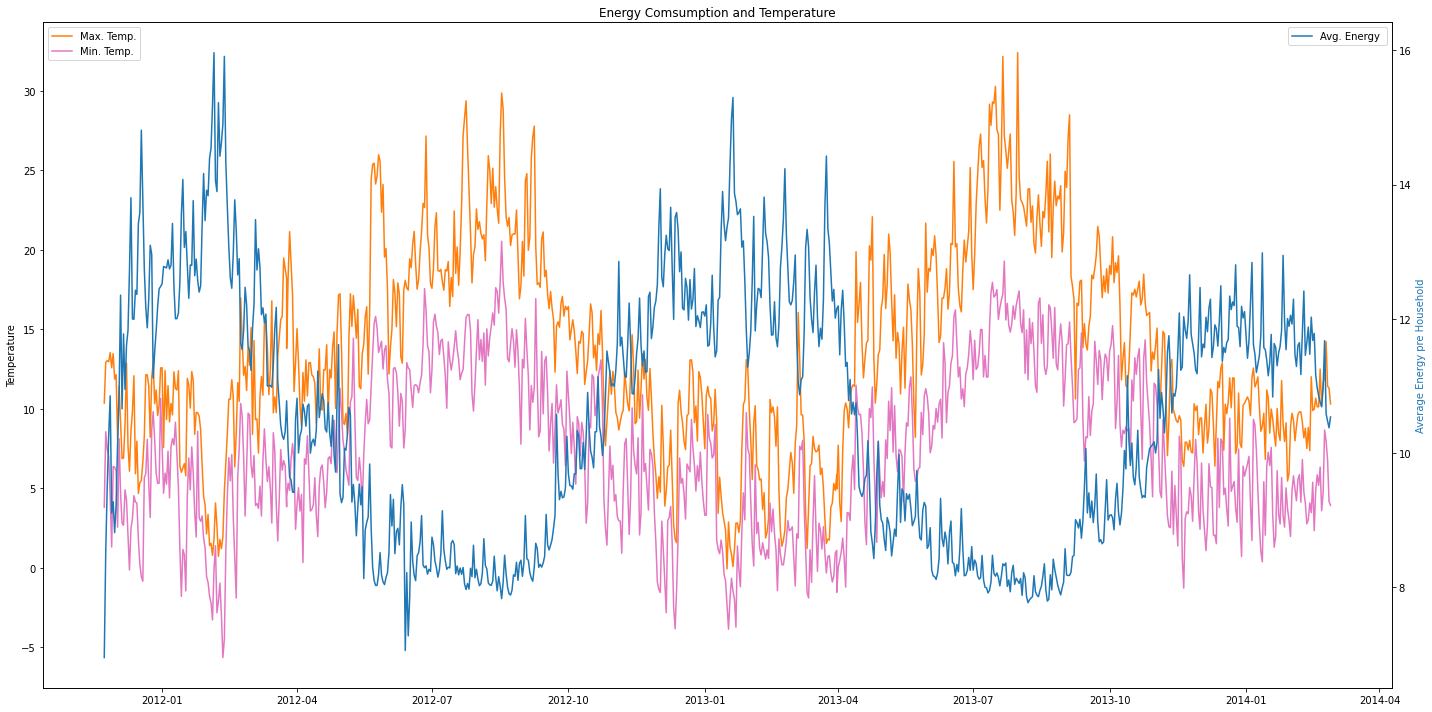

In [30]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color="tab:orange", label="Max. Temp.")
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color="tab:pink", label="Min. Temp.")
ax1.set_ylabel("Temperature")
ax1.legend(loc="upper left")

ax2 = ax1.twinx() # Create a twin Axes sharing the xaxis.
ax2.plot(weather_energy.day, weather_energy.avg_energy, color="tab:blue", label="Avg. Energy ")
ax2.set_ylabel("Average Energy pre Household", color="tab:blue")
ax2.legend(loc="upper right") # bbox_to_anchor to set the legend location
plt.title("Energy Comsumption and Temperature")
fig.tight_layout()
plt.show();

### 2. Humidity
> Humidity and the avg. energy consumption seems to have the same trend.

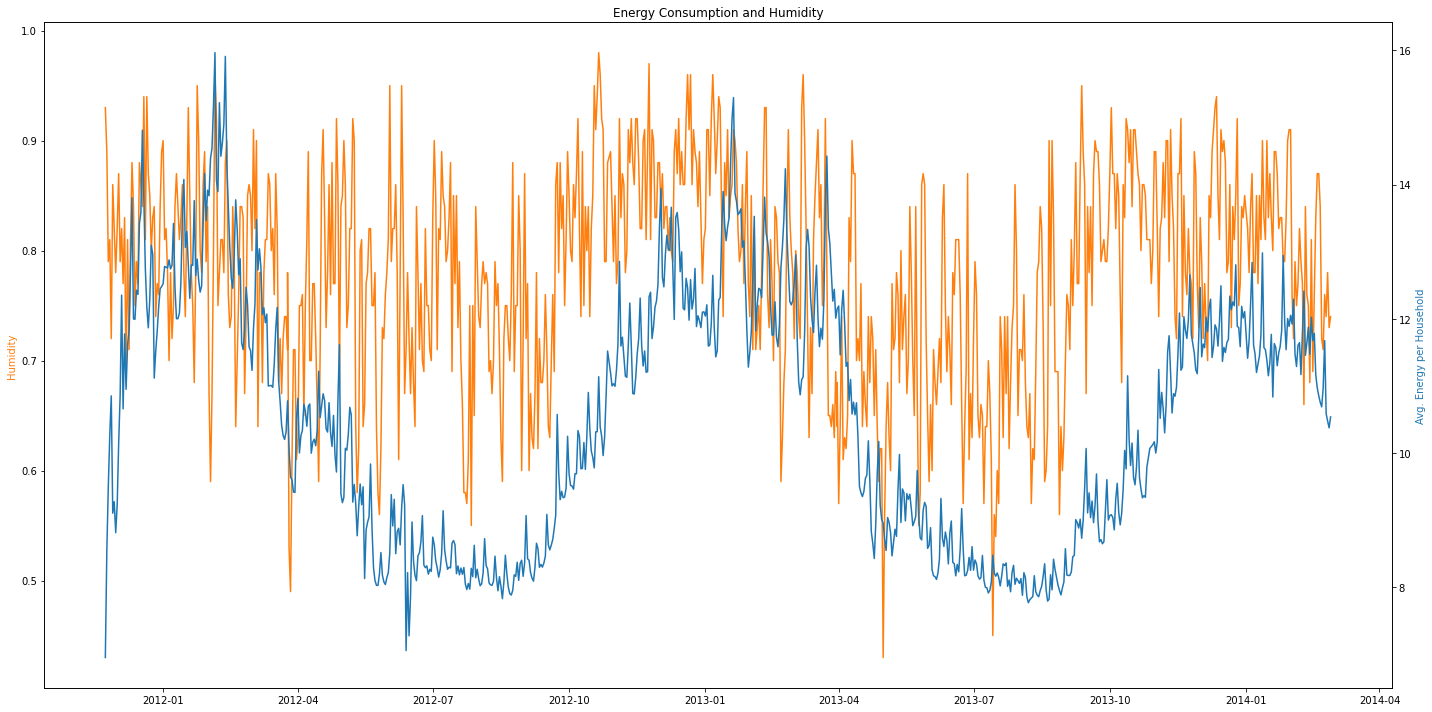

In [31]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(weather_energy.day, weather_energy.humidity, color="tab:orange", label="Humidity")
ax1.set_ylabel("Humidity", color="tab:orange")

ax2 = ax1.twinx()
ax2.plot(weather_energy.day, weather_energy.avg_energy, color="tab:blue", label="Avg. Energy")
ax2.set_ylabel("Avg. Energy per Household", color="tab:blue")

plt.title("Energy Consumption and Humidity")
fig.tight_layout();

### 3. Cloud Cover
> For the plot, energy consumption trends to have the same pattern as the cloud cover.

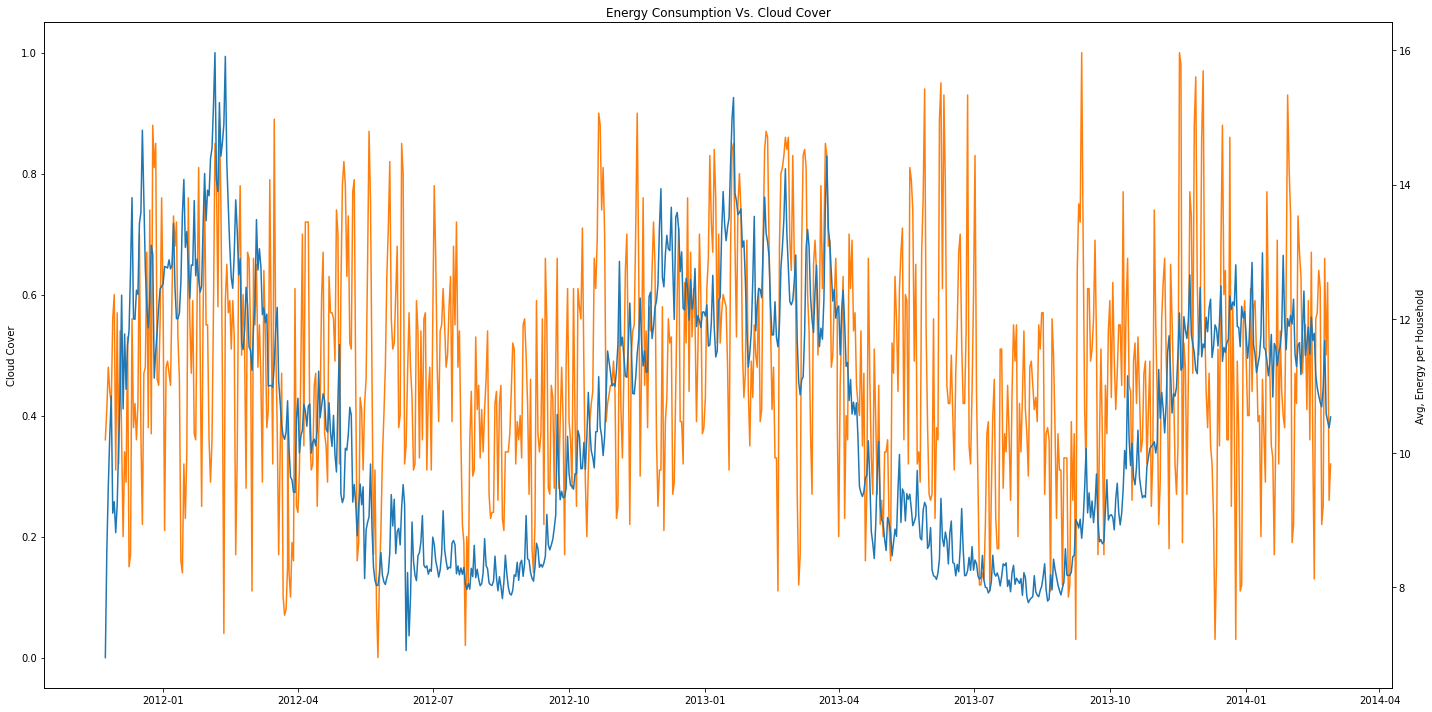

In [32]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(weather_energy.day, weather_energy.cloudCover, color="tab:orange")
ax1.set_ylabel("Cloud Cover")

ax2 = ax1.twinx()
ax2.plot(weather_energy.day, weather_energy.avg_energy, color="tab:blue")
ax2.set_ylabel("Avg, Energy per Household")

plt.title("Energy Consumption Vs. Cloud Cover")
fig.tight_layout();

### 4. Visibility
> The figure shows that there are not directly correlation between them.

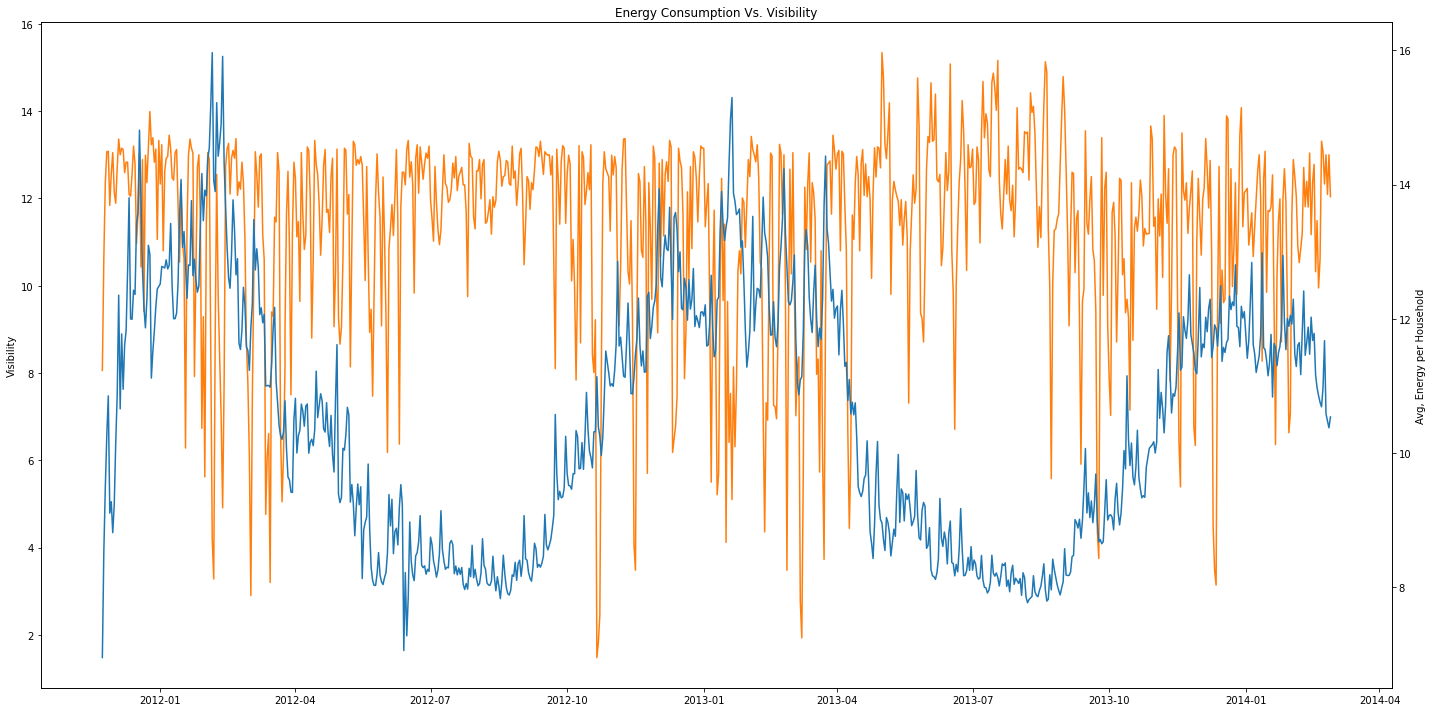

In [33]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(weather_energy.day, weather_energy.visibility, color="tab:orange")
ax1.set_ylabel("Visibility")

ax2 = ax1.twinx()
ax2.plot(weather_energy.day, weather_energy.avg_energy, color="tab:blue")
ax2.set_ylabel("Avg, Energy per Household")

plt.title("Energy Consumption Vs. Visibility")
fig.tight_layout();

### 5. Wind Speed
> Like visibility, no correlation

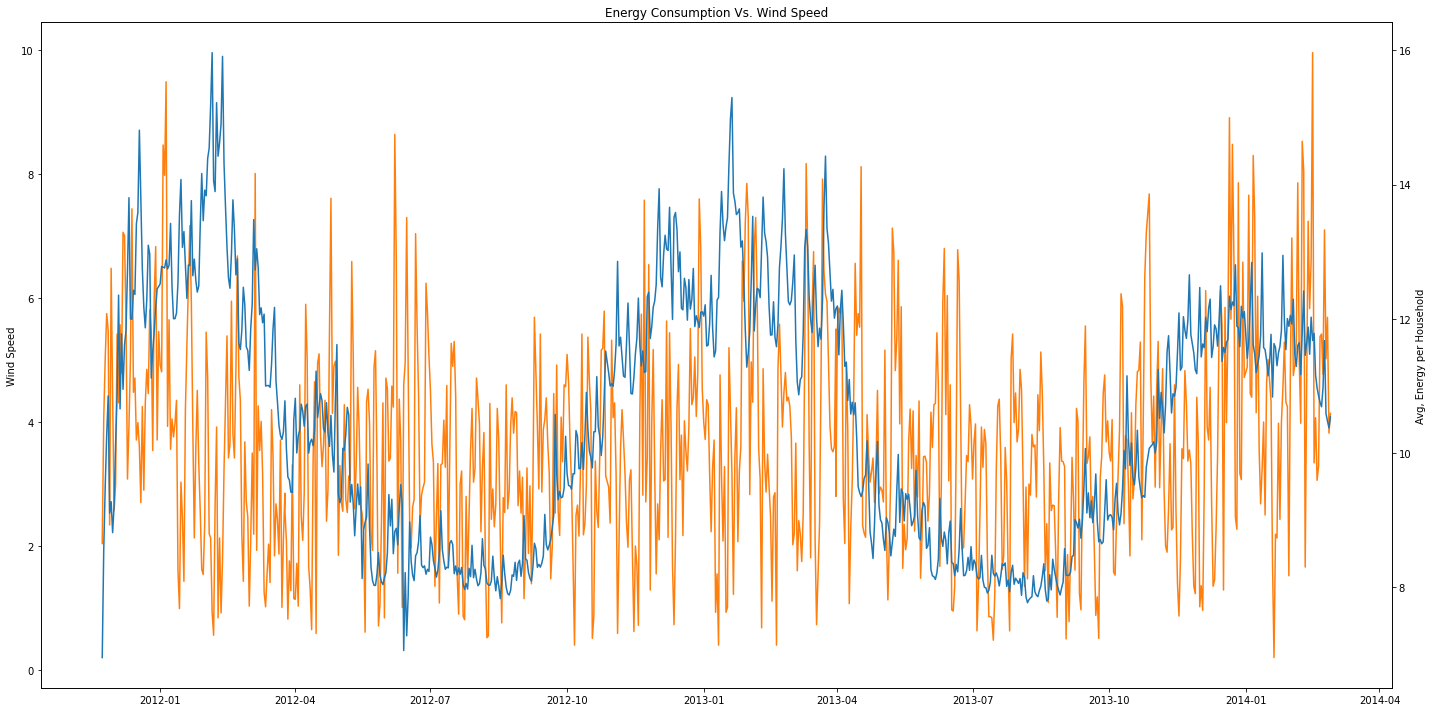

In [34]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(weather_energy.day, weather_energy.windSpeed, color="tab:orange")
ax1.set_ylabel("Wind Speed")

ax2 = ax1.twinx()
ax2.plot(weather_energy.day, weather_energy.avg_energy, color="tab:blue")
ax2.set_ylabel("Avg, Energy per Household")

plt.title("Energy Consumption Vs. Wind Speed")
fig.tight_layout();

### 6. UV Index
> Energy consumption is inversely with the UV index.

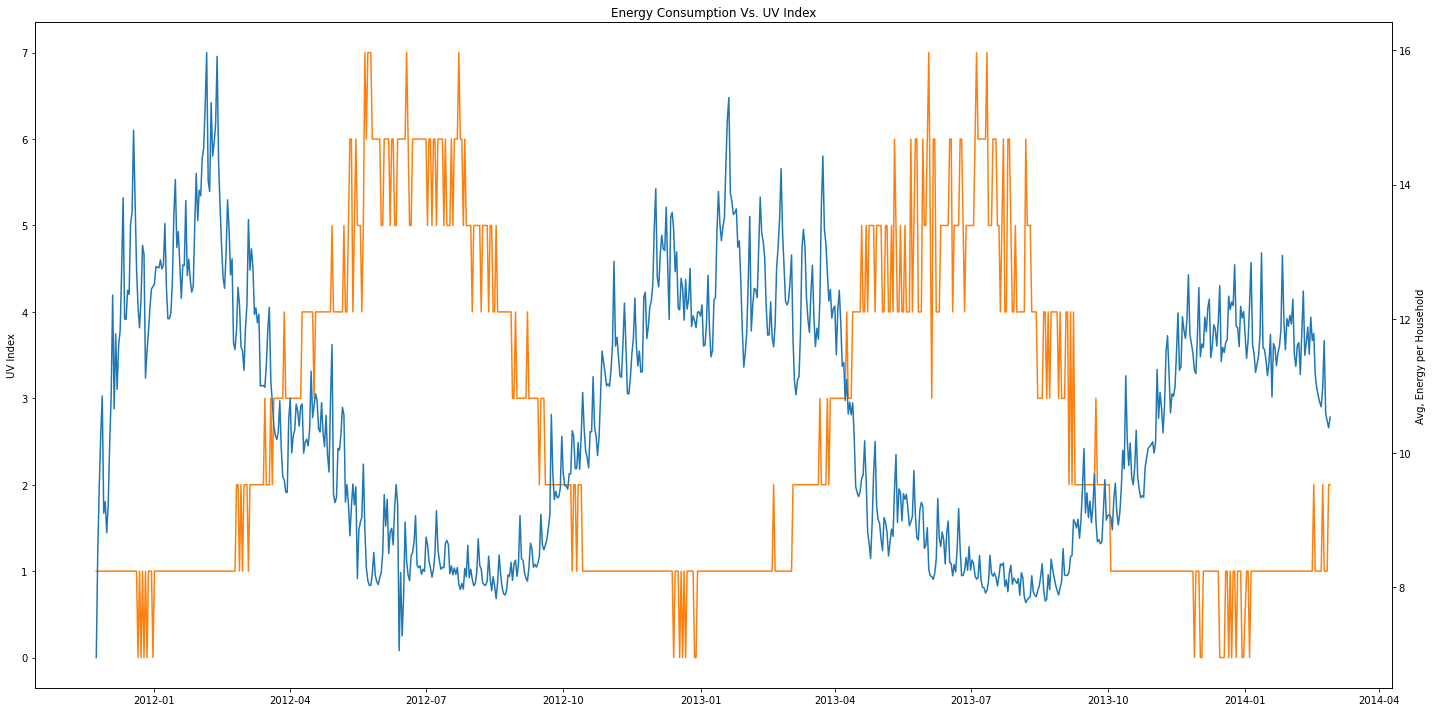

In [35]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(weather_energy.day, weather_energy.uvIndex, color="tab:orange")
ax1.set_ylabel("UV Index")

ax2 = ax1.twinx()
ax2.plot(weather_energy.day, weather_energy.avg_energy, color="tab:blue")
ax2.set_ylabel("Avg, Energy per Household")

plt.title("Energy Consumption Vs. UV Index")
fig.tight_layout();

### 7. Dew Point
> As Dew Point is a function of temperature and humidity, energy relationship will be similar.

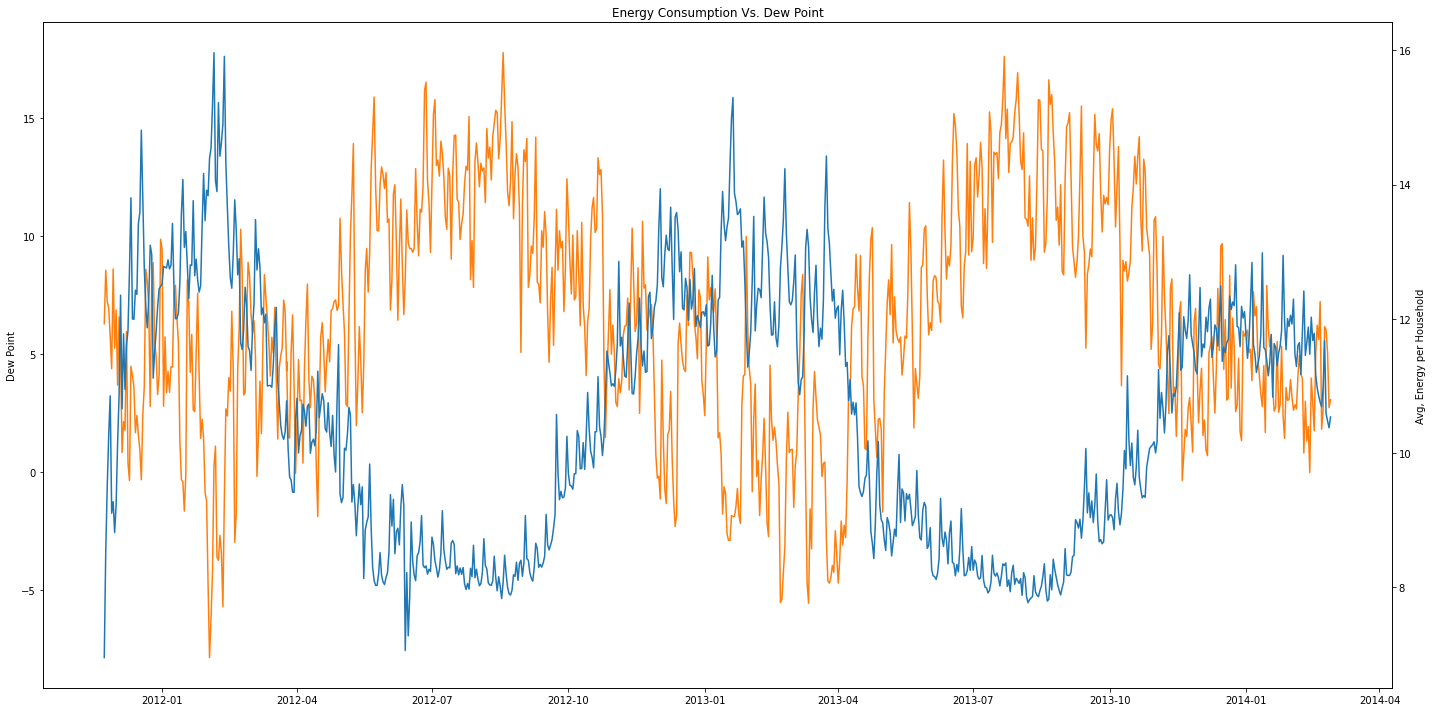

In [36]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(weather_energy.day, weather_energy.dewPoint, color="tab:orange")
ax1.set_ylabel("Dew Point")

ax2 = ax1.twinx()
ax2.plot(weather_energy.day, weather_energy.avg_energy, color="tab:blue")
ax2.set_ylabel("Avg, Energy per Household")

plt.title("Energy Consumption Vs. Dew Point")
fig.tight_layout();

### Correlation between Weather Variables and Energy Consumption
- 

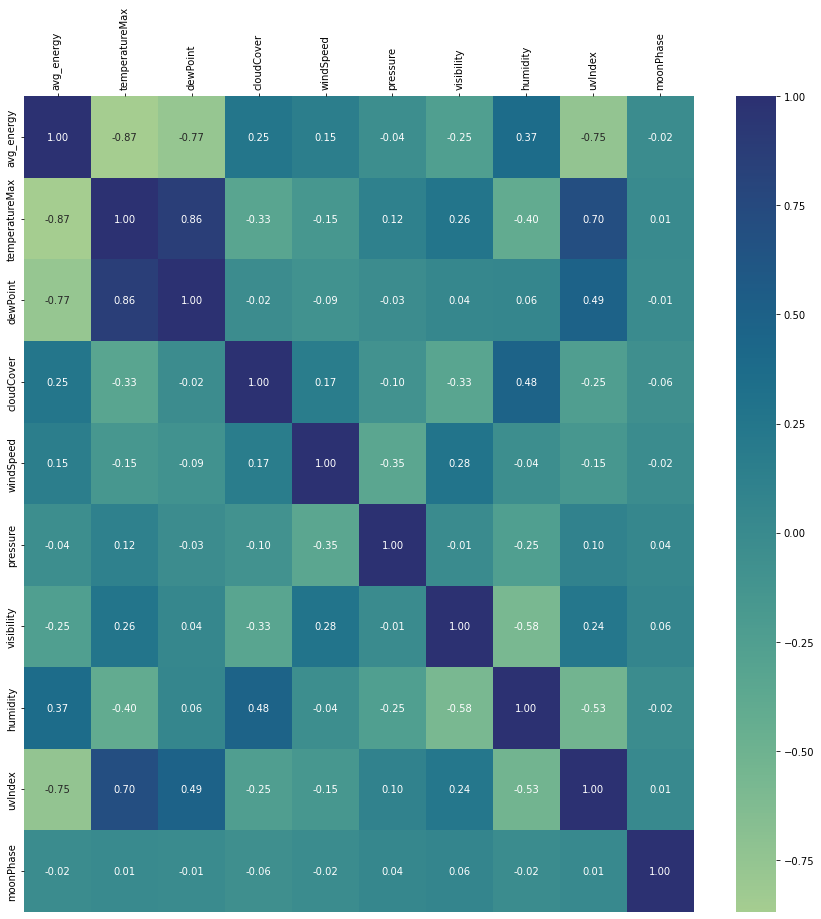

In [37]:
corr_matrix = weather_energy[["avg_energy", "temperatureMax", "dewPoint", 
                      "cloudCover","windSpeed", "pressure", 
                      "visibility", "humidity","uvIndex","moonPhase"]].corr()

# Heat Map visvalization
fig, ax = plt.subplots(figsize=(15,15))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="crest");

### Using Prophet Predicting Future Average Energy Trend

In [38]:
from prophet import Prophet 

In [39]:
df = weather_energy.copy()
df.head()

,day,energy_sum,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,8.06,0.93,6.56,10.36,1.0,8.24,3.81,10.36,2.18,0.94
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,10.64,0.89,7.30,12.93,1.0,9.71,8.56,12.93,7.01,0.97
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,12.38,0.79,4.69,13.03,1.0,7.01,7.46,12.27,4.84,0.01
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,13.07,0.81,11.59,12.96,1.0,11.59,7.01,12.96,4.69,0.05
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.08,0.72,1.31,13.54,1.0,1.31,4.47,13.54,2.94,0.08


#### Date Preparation

In [40]:
# Change the input into a dataframe with two columns: ds and y
df = df[["day", "avg_energy"]]

# Rename columns name into df and y
df = df.rename(columns = {'day':'ds', 'avg_energy':"y"})
df

,ds,y
0,2011-11-23,6.952692
1,2011-11-24,8.536480
2,2011-11-25,9.499781
3,2011-11-26,10.267707
4,2011-11-27,10.850805
...,...,...
822,2014-02-23,11.673756
823,2014-02-24,10.586235
824,2014-02-25,10.476498
825,2014-02-26,10.375366


In [41]:
# Fit dataframe into Prophet
m = Prophet()
m.fit(df)

16:59:33 - cmdstanpy - INFO - Chain [1] start processing
16:59:33 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
# Make future prediction periods, lets try 1 year
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1185,2015-02-23
1186,2015-02-24
1187,2015-02-25
1188,2015-02-26
1189,2015-02-27


In [43]:
# Make forecast 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1185,2015-02-23,7.575806,5.923384,9.225766
1186,2015-02-24,7.380614,5.809883,9.152716
1187,2015-02-25,7.254479,5.575398,8.928760
1188,2015-02-26,7.191722,5.632759,8.906109
1189,2015-02-27,7.195776,5.583404,8.916692


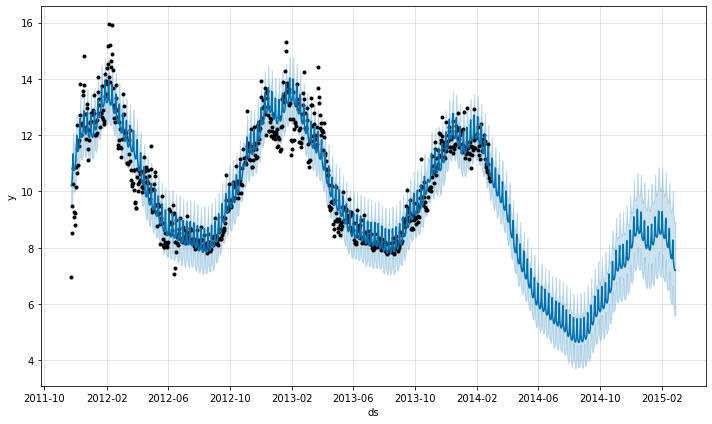

In [44]:
# Visualize the forecast of average energy consumption
fig1 = m.plot(forecast)

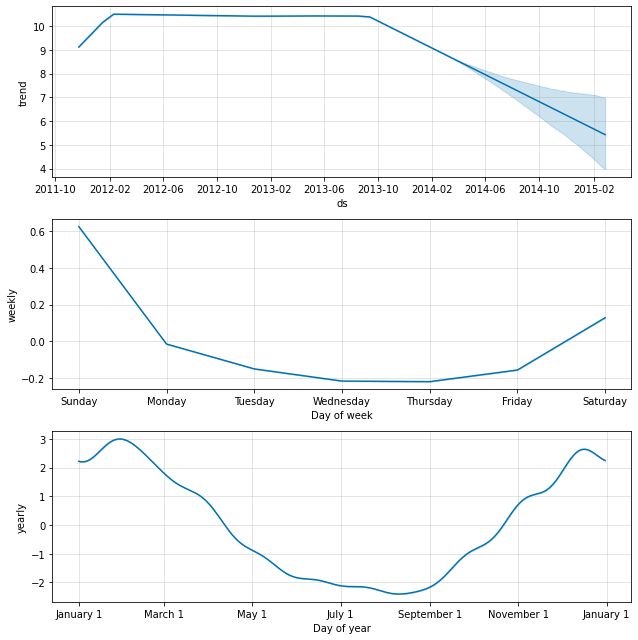

In [45]:
fig2 = m.plot_components(forecast)

In [46]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

Looks like the energy consumption is gradually decreasing, it could be due to more energy efficient house appliances and awareness to global warning etc.